# 数据覆盖全 10dB以上有拐点

2023-05-25 14:55:20.744412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -20.0|  5.000e-01|  2.500e-01|               4|     7.500e-01|     4.375e-01|                  7|   6.250e-01|   3.750e-01|                6|      4.750e-01|
|--------------------------------------------------------------------------------------------------------------------------------------------

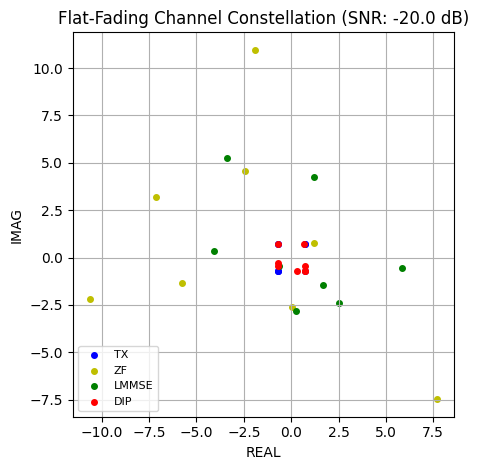

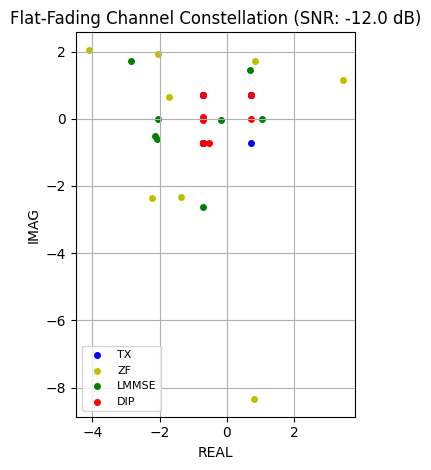

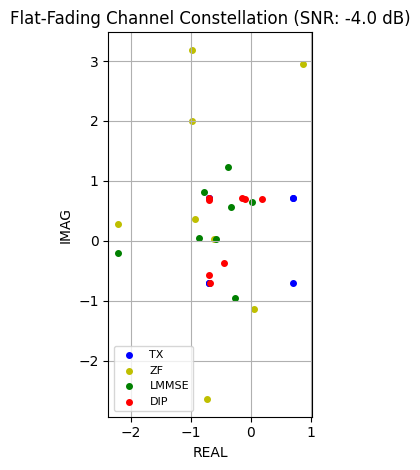

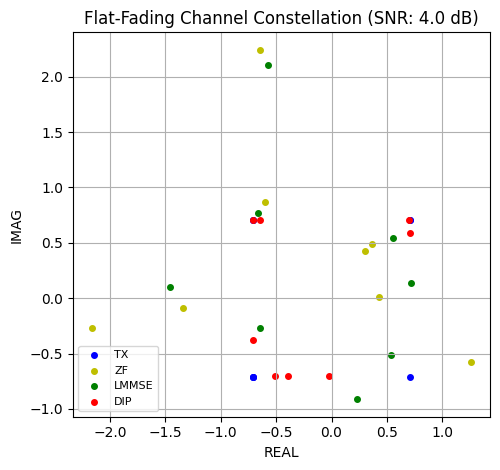

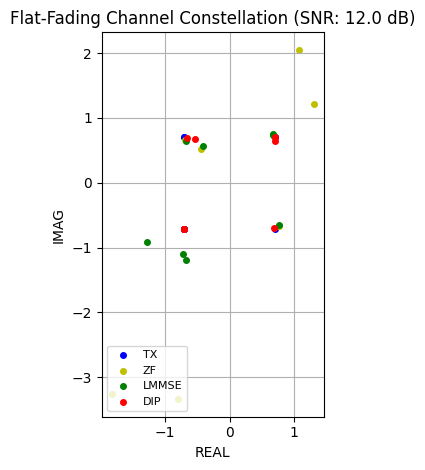

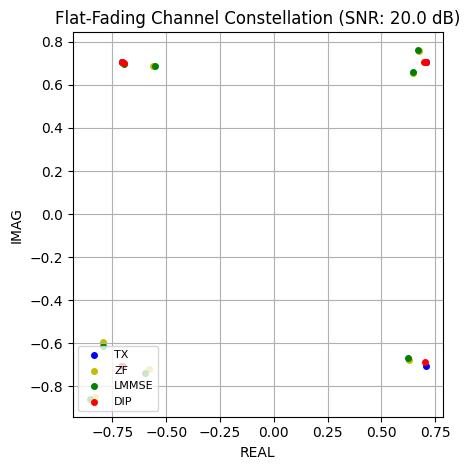

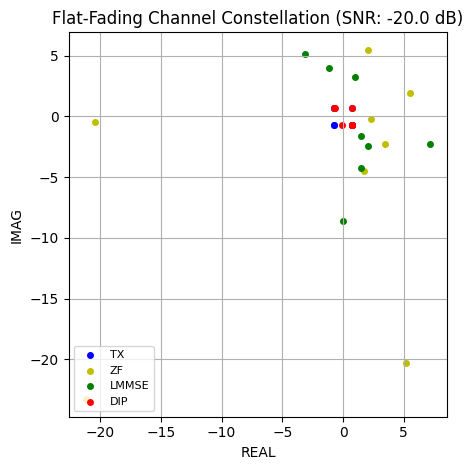

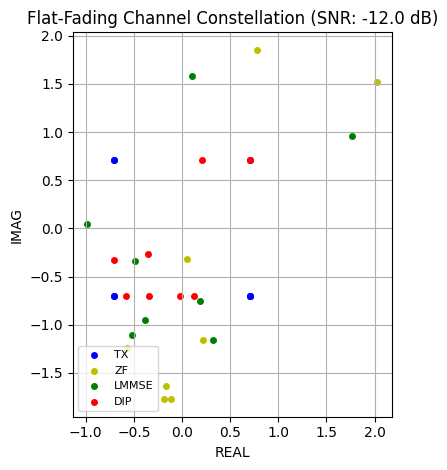

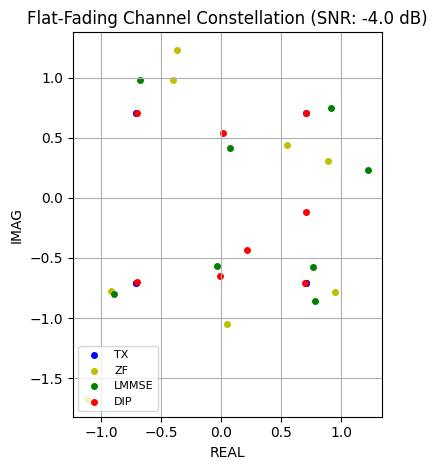

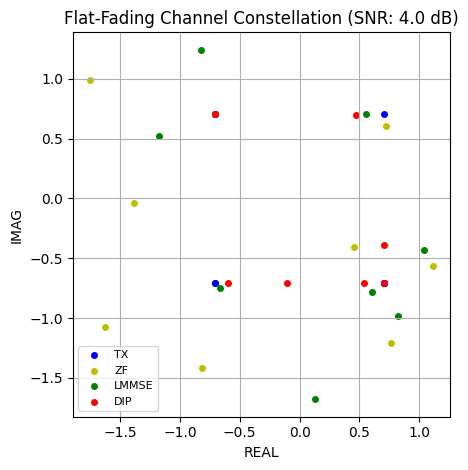

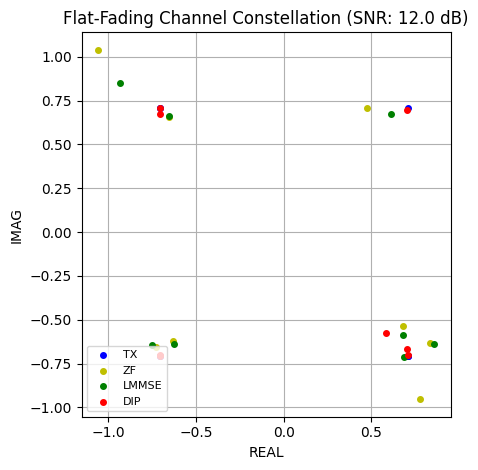

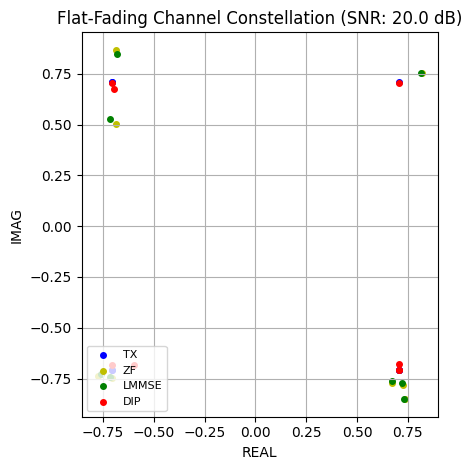

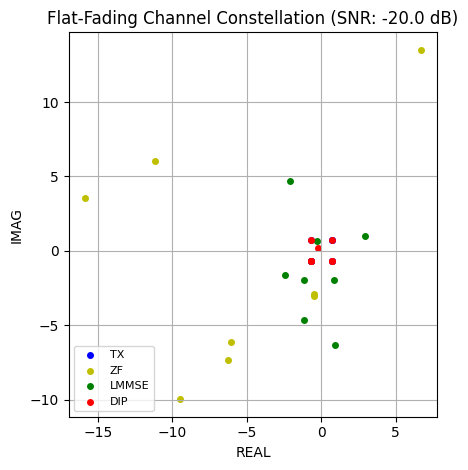

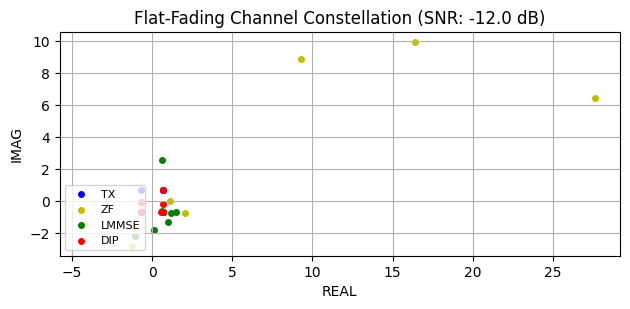

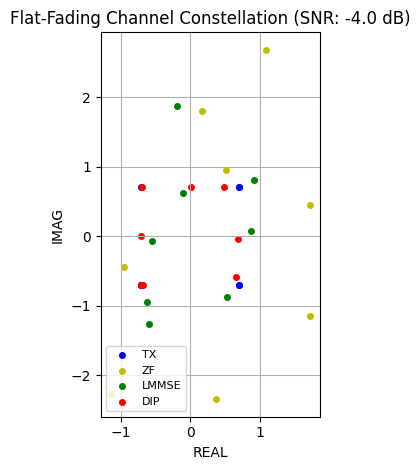

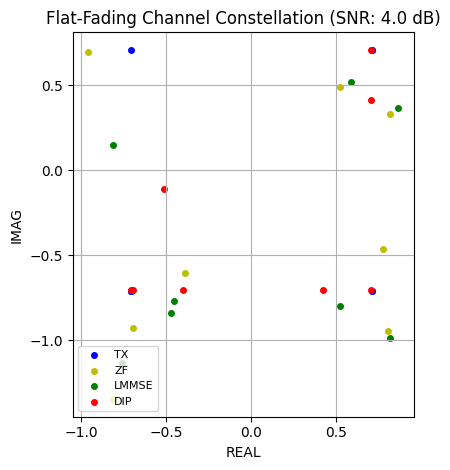

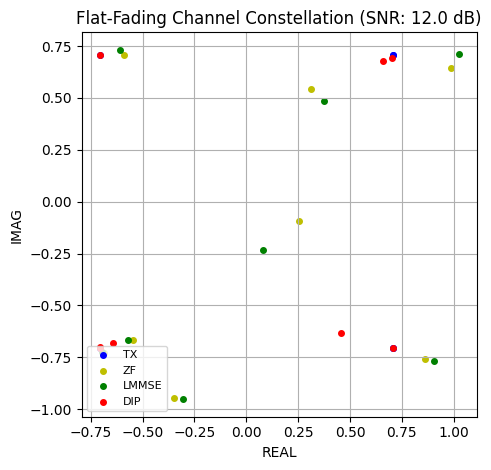

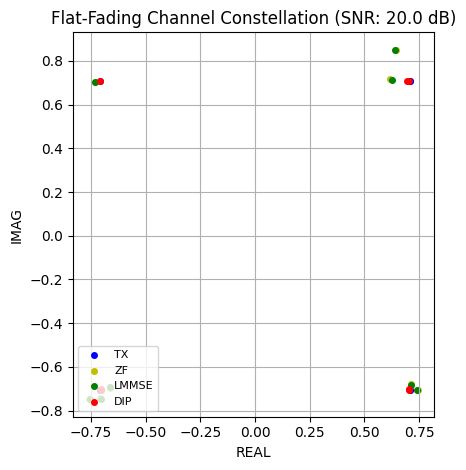

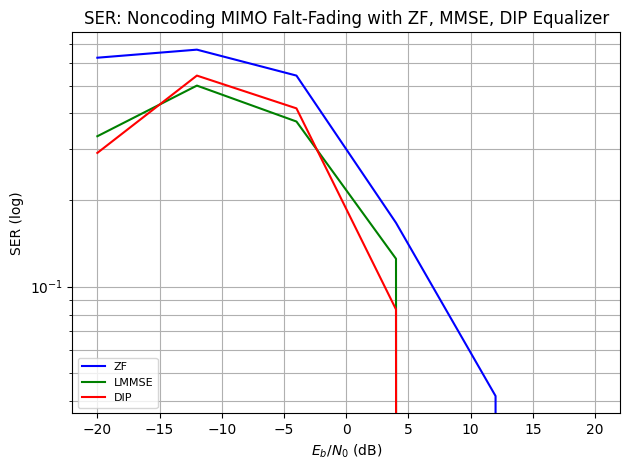

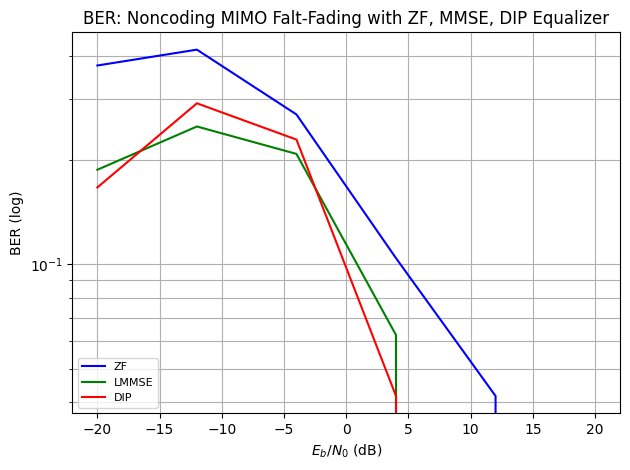

Loading BokehJS ...

Loading BokehJS ...

(array([-20., -12.,  -4.,   4.,  12.,  20.]),
 array([0.625     , 0.66666667, 0.54166667, 0.16666667, 0.04166667,
        0.        ]),
 array([0.33333333, 0.5       , 0.375     , 0.125     , 0.        ,
        0.        ]),
 array([0.29166667, 0.54166667, 0.41666667, 0.08333333, 0.        ,
        0.        ]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 4           # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 4             # Receive Antennas

NUM_DATA_GROUP = 3         # Number of Data Group
BATCH_SIZE = 1             # Number of Parallelly Processed Batches
EBN0_DB_MIN = -20.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 20.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 6        # EBNO Points

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_RX_ANT,
                                           NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)